<a href="https://colab.research.google.com/github/ErickDiaz17799/ProyectosMaestria/blob/main/Practica_3_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso grupal: Detección de anomalías y técnicas de agrupamiento** #
**Realizado por el Equipo 1008 C**
## Erick Ulises Díaz Tapia
## Fausto Mario Díaz Cabrera
## José Gabriel Palacios Navarro ##

#### Carga del dataset

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta ='/content/drive/MyDrive/CTG.csv'
ds = pd.read_csv(ruta)

In [ ]:
print("Tamaño del Dataset:",ds.shape[0], "datos")

Tamaño del Dataset: 2129 datos


Analisis descriptivo de los datos

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

In [ ]:
count_null = ds.isnull().sum()
print(count_null)

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64


Analsis de variables numericas

In [ ]:
pd.set_option('display.max_columns', None)
vnum = ds.describe()
print(vnum)

                 b            e          LBE           LB           AC  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    878.439793  1702.877234   133.303857   133.303857     2.722484   
std     894.084748   930.919143     9.840844     9.840844     3.560850   
min       0.000000   287.000000   106.000000   106.000000     0.000000   
25%      55.000000  1009.000000   126.000000   126.000000     0.000000   
50%     538.000000  1241.000000   133.000000   133.000000     1.000000   
75%    1521.000000  2434.750000   140.000000   140.000000     4.000000   
max    3296.000000  3599.000000   160.000000   160.000000    26.000000   

                FM           UC         ASTV         MSTV         ALTV  \
count  2127.000000  2127.000000  2127.000000  2127.000000  2127.000000   
mean      7.503056     3.669017    47.008933     1.335449     9.884814   
std      39.030452     2.877148    17.210648     0.891543    18.476534   
min       0.000000     0.000000    12

las variables: A, B, C, D, E, AD, DE, LD, FS, SUSP, DS , Tendency y DR seran consideradas variables categoricas debido a sus caracteristicas dicotomicas.

In [ ]:
columnas_dicotomicas = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'DR', 'DS', 'Tendency']

# Convertir a tipo 'category'
ds[columnas_dicotomicas] = ds[columnas_dicotomicas].astype('category')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FileName  2126 non-null   object  
 1   Date      2126 non-null   object  
 2   SegFile   2126 non-null   object  
 3   b         2126 non-null   float64 
 4   e         2126 non-null   float64 
 5   LBE       2126 non-null   float64 
 6   LB        2126 non-null   float64 
 7   AC        2126 non-null   float64 
 8   FM        2127 non-null   float64 
 9   UC        2127 non-null   float64 
 10  ASTV      2127 non-null   float64 
 11  MSTV      2127 non-null   float64 
 12  ALTV      2127 non-null   float64 
 13  MLTV      2127 non-null   float64 
 14  DL        2128 non-null   float64 
 15  DS        2128 non-null   category
 16  DP        2128 non-null   float64 
 17  DR        2128 non-null   category
 18  Width     2126 non-null   float64 
 19  Min       2126 non-null   float64 
 20  Max     

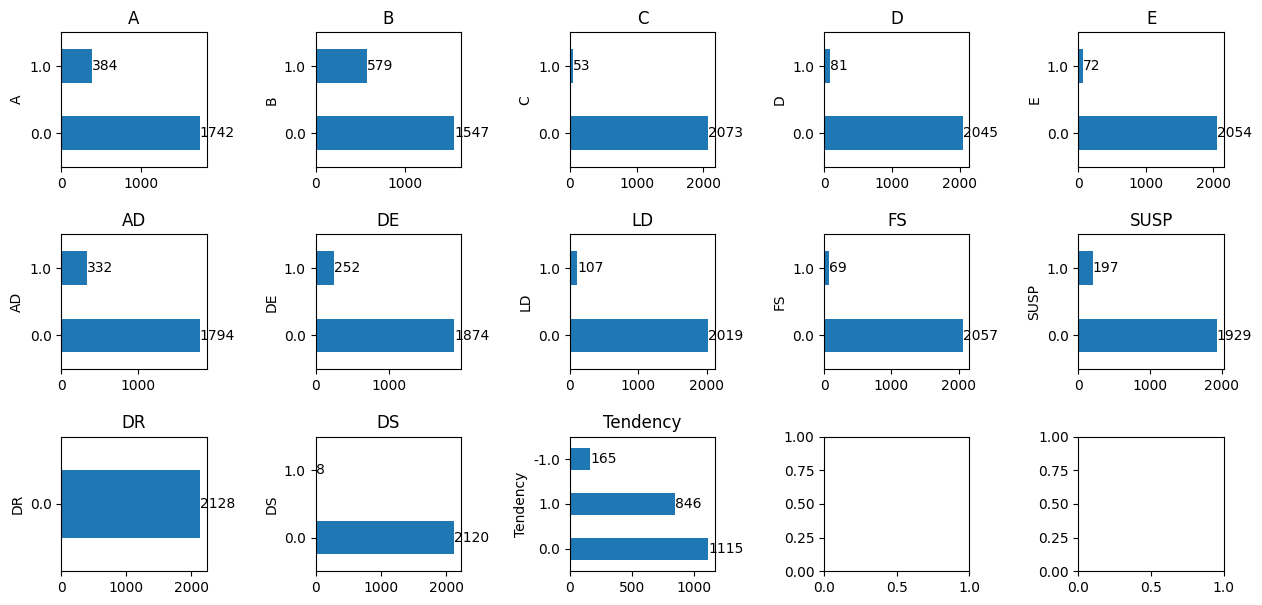

In [ ]:
fig,axes = plt.subplots(nrows=3, ncols=5, figsize=(15,7))

plt.subplots_adjust(
    wspace=0.75,
    hspace=0.5
)

for col, ax in zip(ds[columnas_dicotomicas], axes.ravel()):
    ds[col].value_counts().plot.barh(ax=ax)
    ax.set_title(col)
    ax.bar_label(ax.containers[0])
plt.show()

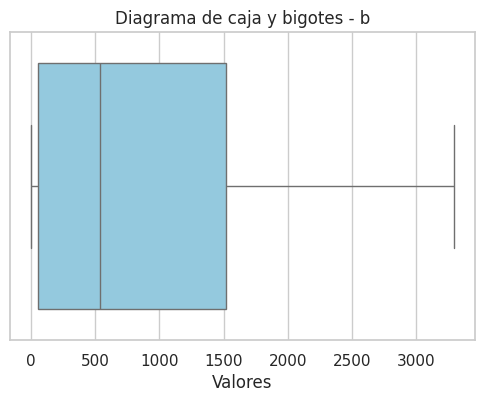

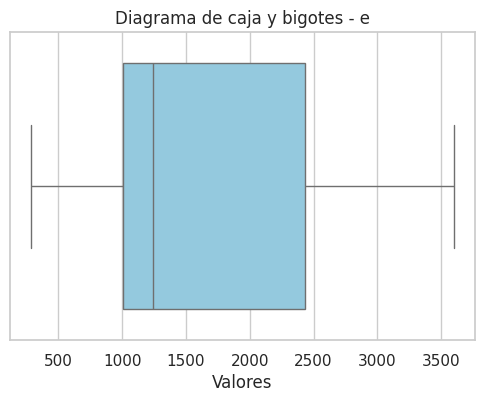

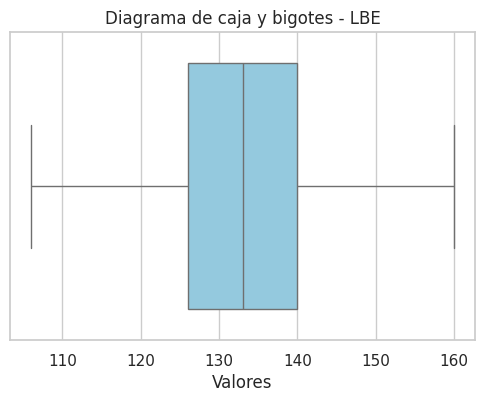

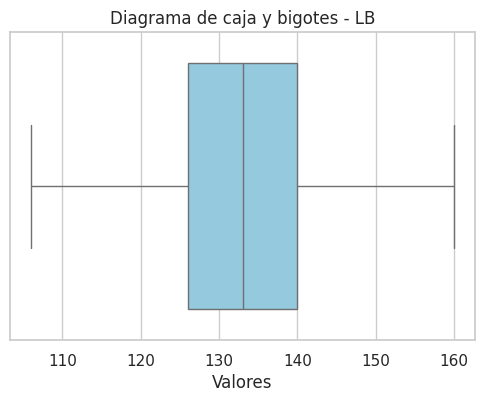

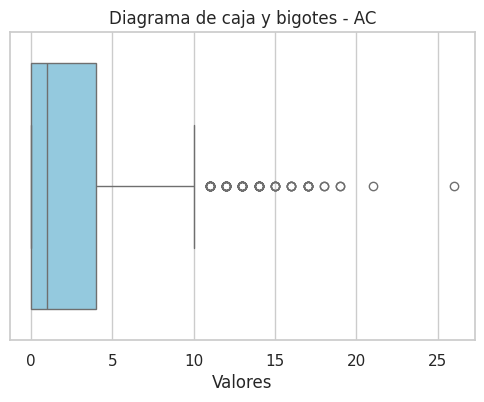

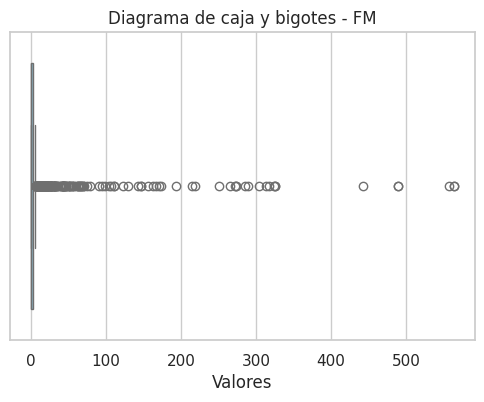

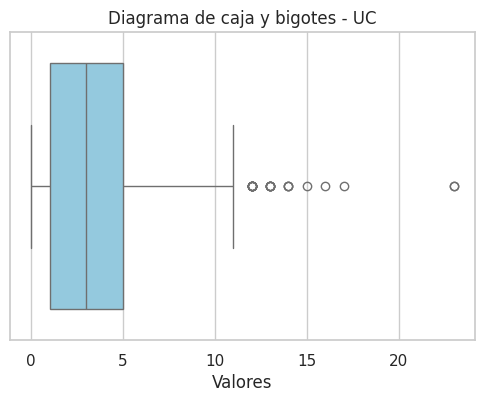

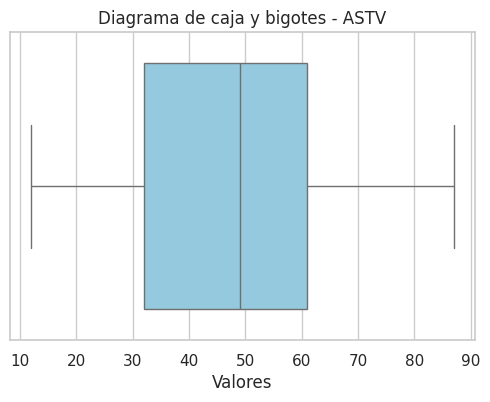

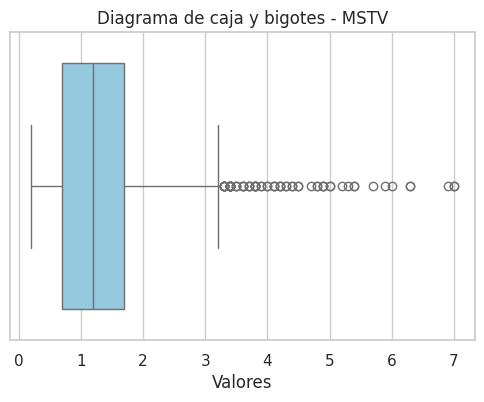

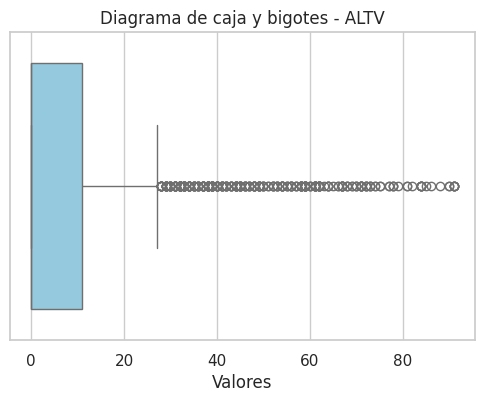

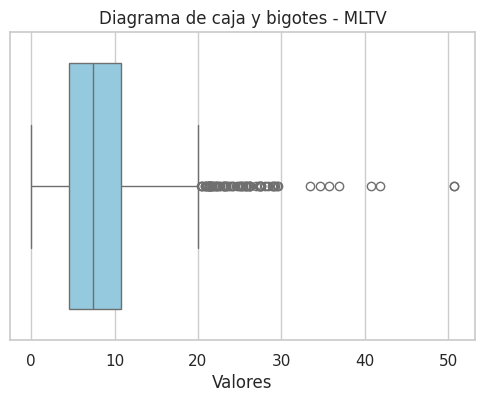

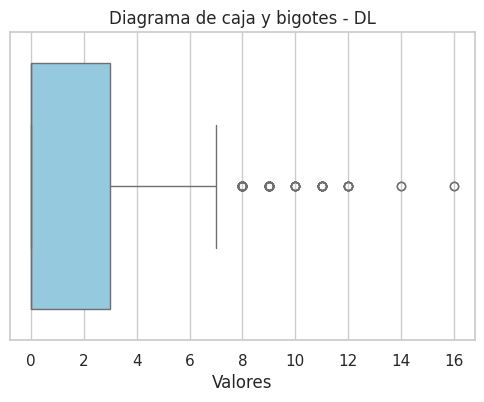

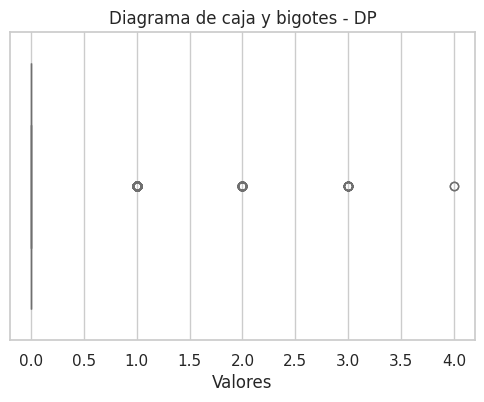

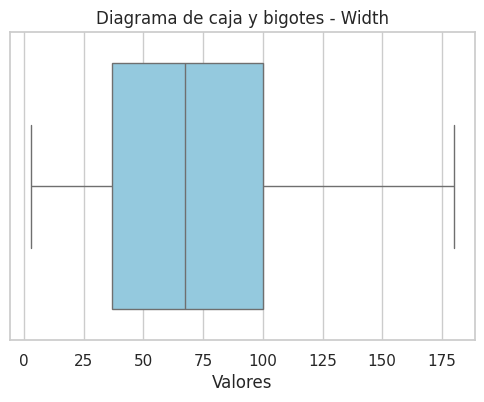

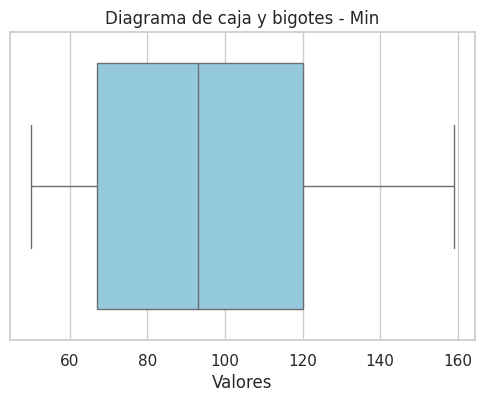

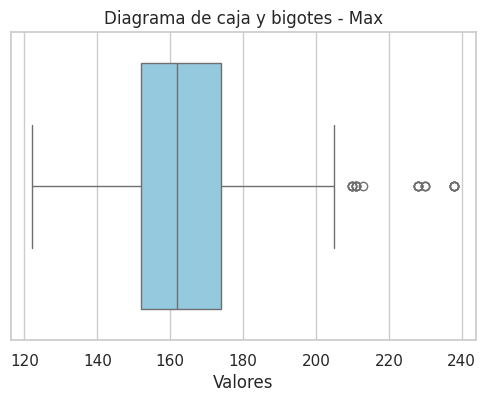

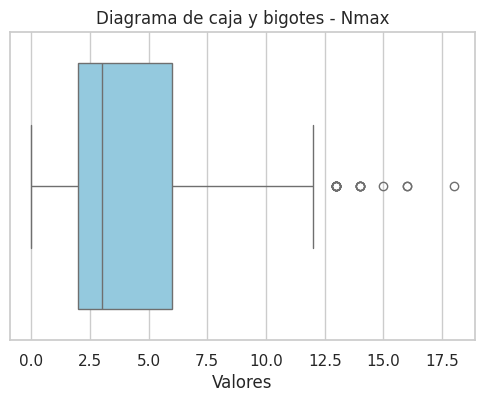

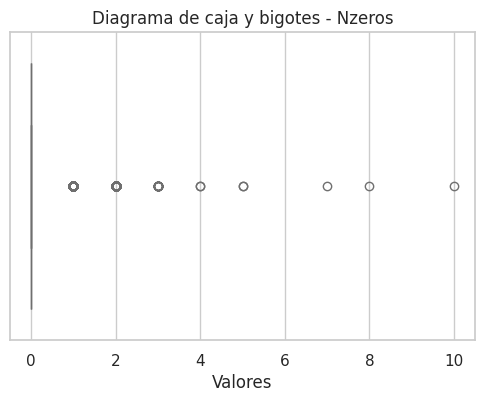

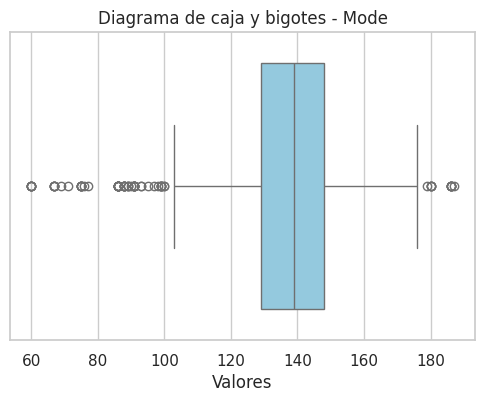

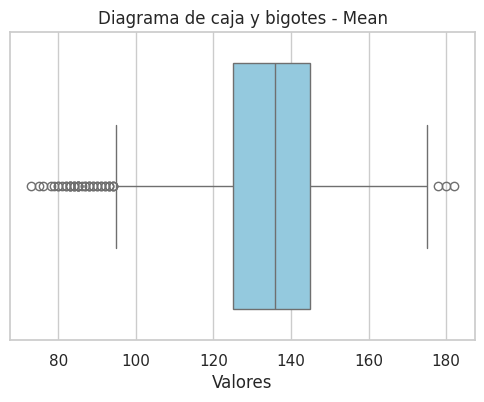

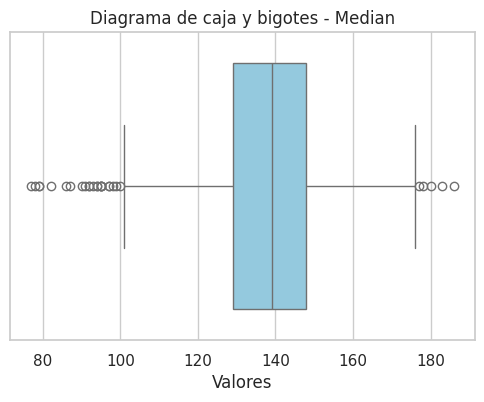

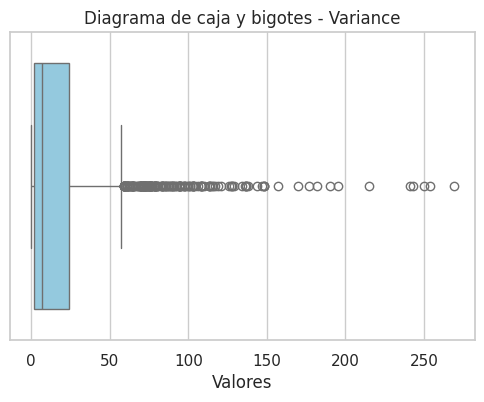

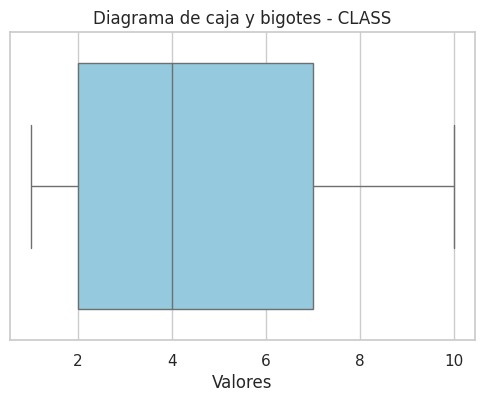

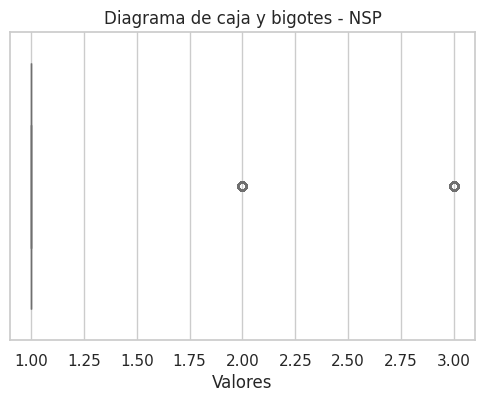

In [ ]:
# Lista de variables numéricas
variables_numericas = [
    'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
    'DL', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
    'Mean', 'Median', 'Variance', 'CLASS', 'NSP'
]

# Configurar el estilo de los gráficos
sb.set(style="whitegrid")

# Crear un diagrama de caja por separado para cada variable
for variable in variables_numericas:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    sb.boxplot(x=ds[variable], orient="h", color="skyblue")  # Boxplot horizontal
    plt.title(f"Diagrama de caja y bigotes - {variable}")
    plt.xlabel("Valores")
    plt.show()

<Figure size 2000x1000 with 0 Axes>

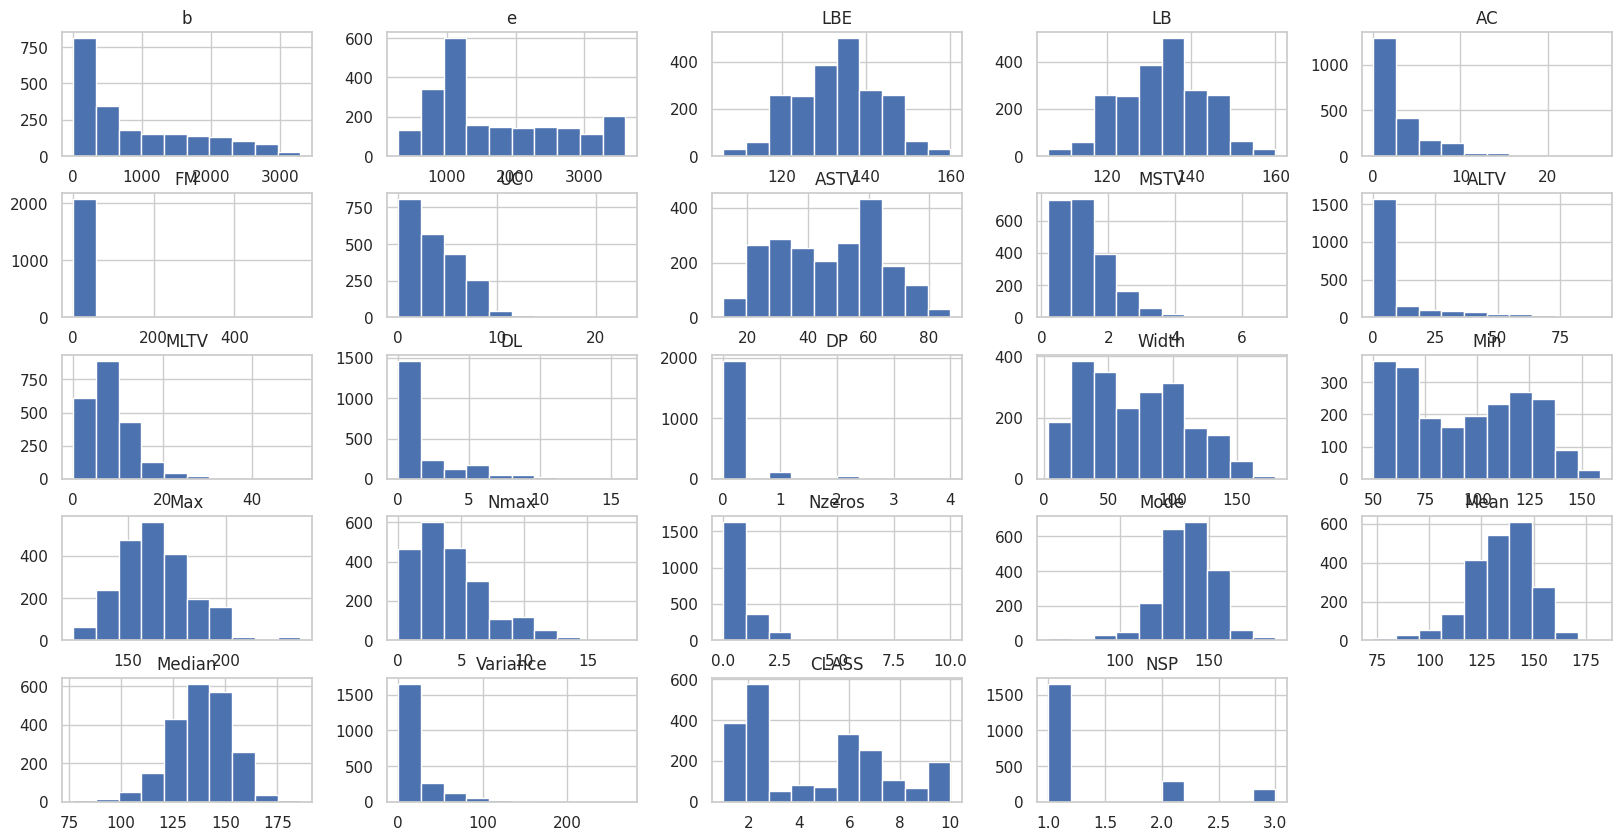

In [ ]:
plt.subplots_adjust(
    wspace=0.75,
    hspace=1
)
plt.rcParams['figure.figsize'] = [20, 10];
ds[variables_numericas].hist()
plt.show()

In [ ]:
ds_seleccionado = ds[variables_numericas]
matriz_correlacion = ds_seleccionado.corr()
print(matriz_correlacion)

                 b         e       LBE        LB        AC        FM  \
b         1.000000  0.944912 -0.020400 -0.020400 -0.038359 -0.133849   
e         0.944912  1.000000 -0.013979 -0.013979  0.071572 -0.119249   
LBE      -0.020400 -0.013979  1.000000  1.000000 -0.077967 -0.033305   
LB       -0.020400 -0.013979  1.000000  1.000000 -0.077967 -0.033305   
AC       -0.038359  0.071572 -0.077967 -0.077967  1.000000  0.053956   
FM       -0.133849 -0.119249 -0.033305 -0.033305  0.053956  1.000000   
UC        0.225595  0.386856 -0.127722 -0.127722  0.212100  0.010623   
ASTV     -0.126355 -0.066374  0.305570  0.305570 -0.197985 -0.095019   
MSTV      0.040505  0.044605 -0.279607 -0.279607  0.191378  0.172669   
ALTV     -0.109861 -0.104566  0.285630  0.285630 -0.345162 -0.038904   
MLTV     -0.100027 -0.108141 -0.032091 -0.032091 -0.128901  0.069739   
DL        0.091783  0.163257 -0.155908 -0.155908 -0.011350  0.110411   
DP        0.091688  0.111917 -0.117133 -0.117133 -0.110317  0.24

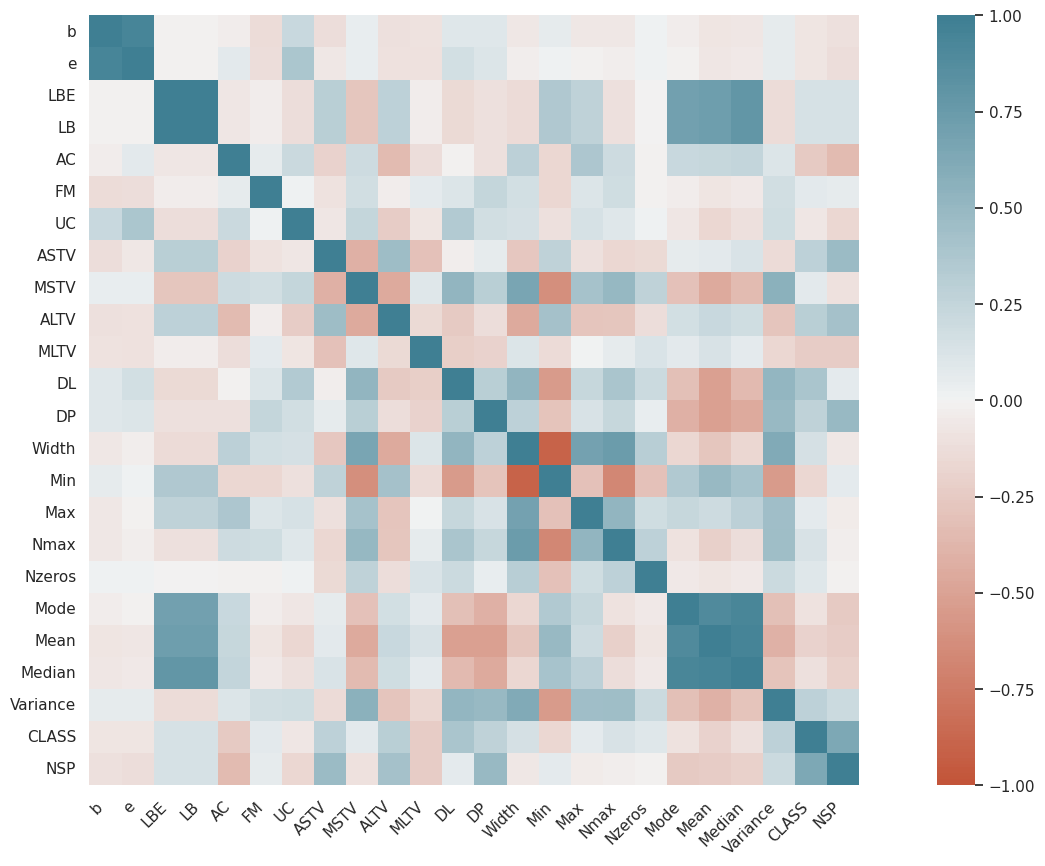

In [ ]:
df_num = ds[variables_numericas]

corr= df_num.corr()
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# Contar ceros en columnas específicas
ceros_por_columna = (ds[variables_numericas] == 0).sum()

# Mostrar el resultado
print(ceros_por_columna)

b            314
e              0
LBE            0
LB             0
AC           891
FM          1311
UC           332
ASTV           0
MSTV           0
ALTV        1240
MLTV         137
DL          1232
DP          1949
Width          0
Min            0
Max            0
Nmax         107
Nzeros      1624
Mode           0
Mean           0
Median         0
Variance     187
CLASS          0
NSP            0
dtype: int64


# Detección de Outlier
**Método intercuartil**

El método intercuartil (IQR) es una técnica estadística utilizada para detectar valores atípicos (outliers) en un conjunto de datos. Se basa en medir la dispersión de los datos entre los cuartiles 1 (Q1) y 3 (Q3), y considera como anomalías aquellos valores que se encuentran significativamente por fuera de este rango.

In [ ]:
def out_iqr(df , column):
    global lower,upper
    # Calculo de los cuartiles Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    # Calculo del rango intercuantilico, IQR
    IQR = Q3 - Q1
    # Límite para los outliers
    cut_off = IQR * 1.5
    # Calculo de los limites superior e inferior
    lim_inf, lim_sup = Q1 - cut_off, Q3 + cut_off

    print(f'IQR: {IQR:.2f} \t limite inferior: {lim_inf:.2f} \t limite superior {lim_sup:.2f}')
    # Calculo del número de registros por debajo y por encima de los valores, respectivamente
    df1 = df[df[column] > lim_sup]
    df2 = df[df[column] < lim_inf]
    total_outliers =  df1.shape[0] + df2.shape[0]
    return print(f'Número total de outliers detectados: {total_outliers}')

In [ ]:
# Eliminar registros con valores nulos
df_clean = ds_seleccionado.dropna()

# Número de columnas que quieres analizar
N_TOP_COLS = 10

# Calculamos la varianza de todas las columnas en df_clean
top_vars = df_clean.var().sort_values(ascending=False).head(N_TOP_COLS).index.tolist()

# Aplicamos IQR solo a esas columnas
for col in top_vars:
    print(f'Columna: {col}')
    out_iqr(df_clean, col)
    print(25 * '--')

Columna: e
IQR: 1425.75 	 limite inferior: -1129.62 	 limite superior 4573.38
Número total de outliers detectados: 0
--------------------------------------------------
Columna: b
IQR: 1466.00 	 limite inferior: -2144.00 	 limite superior 3720.00
Número total de outliers detectados: 0
--------------------------------------------------
Columna: Width
IQR: 63.00 	 limite inferior: -57.50 	 limite superior 194.50
Número total de outliers detectados: 0
--------------------------------------------------
Columna: FM
IQR: 2.00 	 limite inferior: -3.00 	 limite superior 5.00
Número total de outliers detectados: 310
--------------------------------------------------
Columna: Min
IQR: 53.00 	 limite inferior: -12.50 	 limite superior 199.50
Número total de outliers detectados: 0
--------------------------------------------------
Columna: Variance
IQR: 22.00 	 limite inferior: -31.00 	 limite superior 57.00
Número total de outliers detectados: 184
--------------------------------------------------

**Análisis de Resultados del Método Intercuartil (IQR)**

Para mejorar la interpretabilidad del análisis, se seleccionaron las 10 variables numéricas continuas con mayor varianza, ya que una alta dispersión puede estar asociada a la presencia de valores extremos relevantes. Esta estrategia permite enfocar la detección de outliers en columnas más informativas y evitar ruido innecesario.

Los resultados muestran que tres variables concentraron la mayoría de los outliers detectados: FM (310), ALTV (309) y Variance (184). Estas variables presentan un comportamiento claramente distinto en ciertos registros, lo que puede indicar errores, condiciones especiales o subgrupos particulares dentro del conjunto de datos.

En cambio, variables como e, b, Width, Min y ASTV, a pesar de su alta varianza, no mostraron valores fuera del rango definido por el IQR, lo que sugiere una distribución interna más uniforme. Mode y Max presentaron una cantidad moderada de outliers (73 y 24 respectivamente), lo cual podría ser relevante en contextos específicos.

En conjunto, el análisis permite priorizar la revisión de variables con mayor presencia de anomalías, enfocando los esfuerzos en aquellas que realmente muestran desviaciones significativas dentro del dataset.

**Isolation Forest**

El algoritmo Isolation Forest es un método de detección de anomalías basado en árboles de partición aleatoria. Su lógica se centra en aislar observaciones: los puntos anómalos tienden a ser más fáciles de separar del resto de los datos, por lo que requieren menos divisiones (o "aislamientos"). A diferencia de métodos estadísticos como IQR, no asume ninguna distribución específica, lo que lo hace especialmente útil en conjuntos de datos complejos o multivariados.


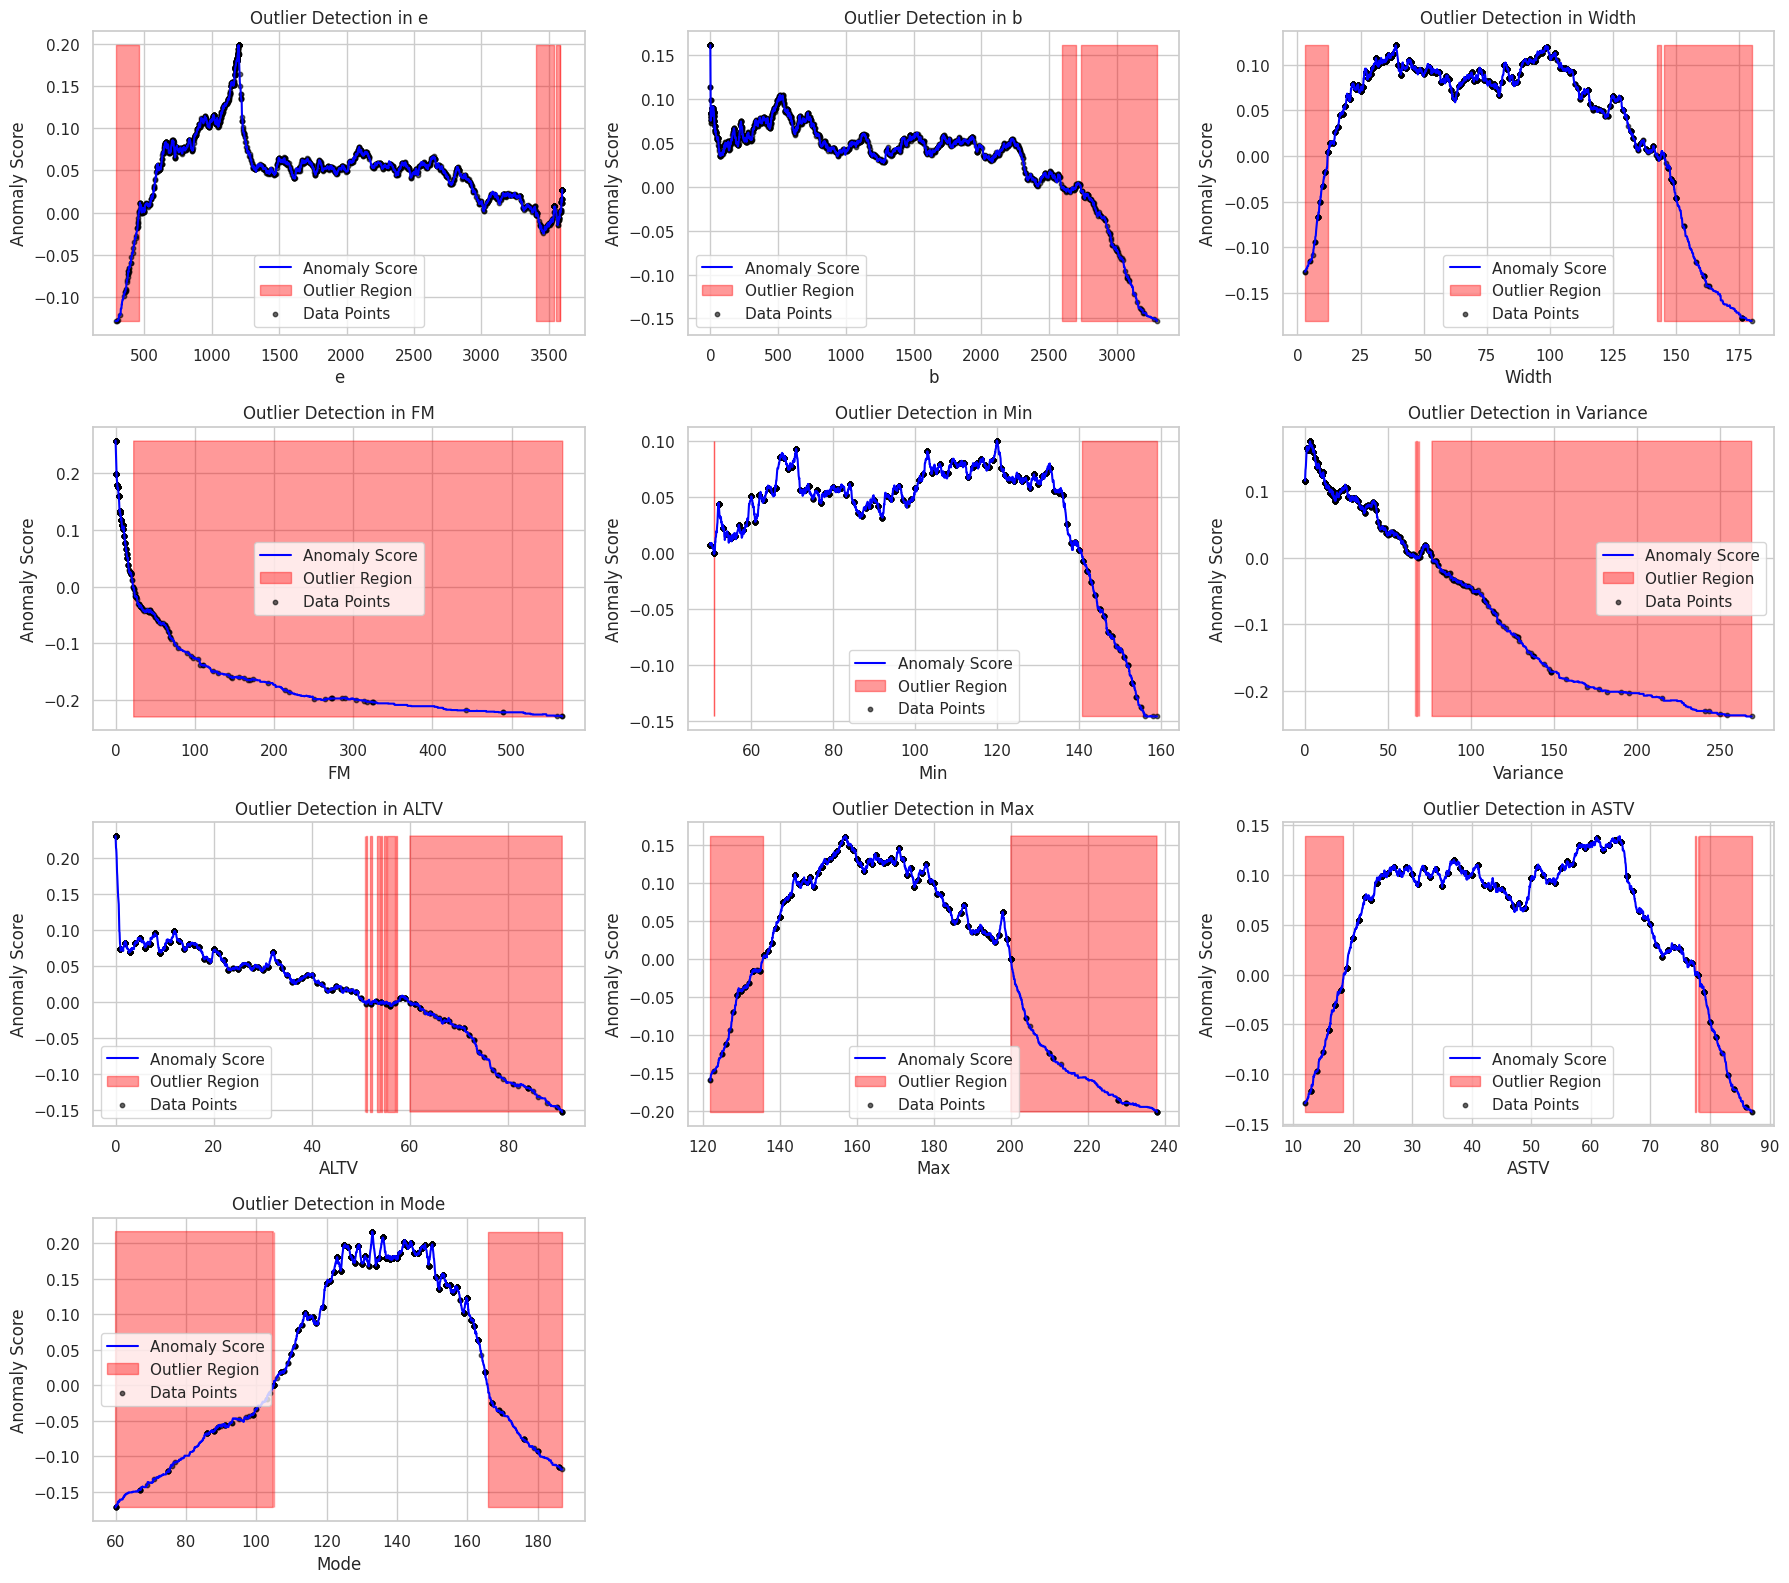

Columna: e
Número de outliers detectados: 105
--------------------------------------------------
Columna: b
Número de outliers detectados: 107
--------------------------------------------------
Columna: Width
Número de outliers detectados: 104
--------------------------------------------------
Columna: FM
Número de outliers detectados: 106
--------------------------------------------------
Columna: Min
Número de outliers detectados: 86
--------------------------------------------------
Columna: Variance
Número de outliers detectados: 107
--------------------------------------------------
Columna: ALTV
Número de outliers detectados: 102
--------------------------------------------------
Columna: Max
Número de outliers detectados: 101
--------------------------------------------------
Columna: ASTV
Número de outliers detectados: 99
--------------------------------------------------
Columna: Mode
Número de outliers detectados: 97
--------------------------------------------------


In [ ]:
from sklearn.ensemble import IsolationForest

num_cols = 3
num_vars = len(top_vars)
num_rows = int(np.ceil(num_vars / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4), facecolor='w', edgecolor='k')
axs = axs.ravel()

# Diccionario para almacenar el número de outliers por columna
outlier_counts = {}

for i, column in enumerate(top_vars):
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(ds[column].values.reshape(-1, 1))

    # Generamos valores para el rango de la variable
    xx = np.linspace(ds[column].min(), ds[column].max(), len(ds[column])).reshape(-1, 1)

    # Score de anomalía y predicción
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    # Datos reales
    data_anomaly_score = isolation_forest.decision_function(ds[column].values.reshape(-1, 1))
    data_pred = isolation_forest.predict(ds[column].values.reshape(-1, 1))

    # Guardamos la cantidad de outliers detectados
    outlier_counts[column] = (data_pred == -1).sum()

    # Gráfico
    axs[i].plot(xx, anomaly_score, label='Anomaly Score', color='blue')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                        where=outlier == -1, color='red', alpha=0.4, label='Outlier Region')
    axs[i].scatter(ds[column], data_anomaly_score, color='black', s=10, alpha=0.6, label='Data Points')
    axs[i].legend()
    axs[i].set_title(f"Outlier Detection in {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Anomaly Score")

# Eliminar ejes vacíos
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Mostrar los resultados numéricos después del gráfico
for col, count in outlier_counts.items():
    print(f"Columna: {col}")
    print(f"Número de outliers detectados: {count}")
    print(25 * '--')

**Análisis de Resultados del Isolation Forest**

Al aplicar el algoritmo Isolation Forest sobre las variables numéricas continuas con mayor varianza, se observa una detección relativamente uniforme de outliers en todas las columnas analizadas. En la mayoría de los casos, el número de observaciones atípicas identificadas oscila entre 97 y 107, lo cual es coherente con la tasa de contaminación del 5% especificada en el modelo. Esto indica que Isolation Forest distribuye los outliers de forma sistemática, sin concentrarlos fuertemente en una o dos variables.

A diferencia del método intercuartil (IQR), donde solo tres variables (FM, ALTV y Variance) presentaron una cantidad significativa de outliers, Isolation Forest detecta valores atípicos en todas las columnas evaluadas. Esta diferencia se debe a la lógica del algoritmo: mientras que IQR identifica valores extremos desde una perspectiva puramente estadística (basada en rangos de dispersión), Isolation Forest evalúa el grado de aislamiento de cada observación dentro de la distribución general, sin asumir ninguna forma específica.

La variable FM, que con IQR presentó el mayor número de outliers (310), aquí aparece con una cantidad mucho menor (106), alineada con el resto de columnas. En cambio, variables como e, b, Variance y Width, que no mostraron ningún outlier con IQR, sí presentan entre 104 y 107 outliers con Isolation Forest. Esto evidencia que ambos métodos capturan diferentes tipos de anomalías: IQR es más sensible a valores extremos claros, mientras que Isolation Forest detecta registros que, aunque no sean extremos en valor, se comportan de forma inusual respecto a la estructura del conjunto de datos.

Para obtener una visión más robusta de los datos atípicos, podría ser útil comparar directamente los resultados de ambos métodos por registro. Esto permitiría identificar si ciertos outliers son coincidentes en ambos enfoques, lo cual aumentaría la confianza en su carácter anómalo. Esta combinación puede servir como base para decisiones más informadas sobre la limpieza o el análisis de casos particulares en el dataset.

**Local Outlier Factor (LOF)**

Este método no supervisado para identificación de anomalías, se caracteriza por tener un enfoque basado en la densidad. LOF mide la densidad local de cada punto de datos y la compara con la densidad de sus vecinos, no requiere etiquetas de clase. Considera como anomalías a los puntos con una densidad significativamente menor que sus vecinos.

Columnas disponibles tras la normalización: Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')


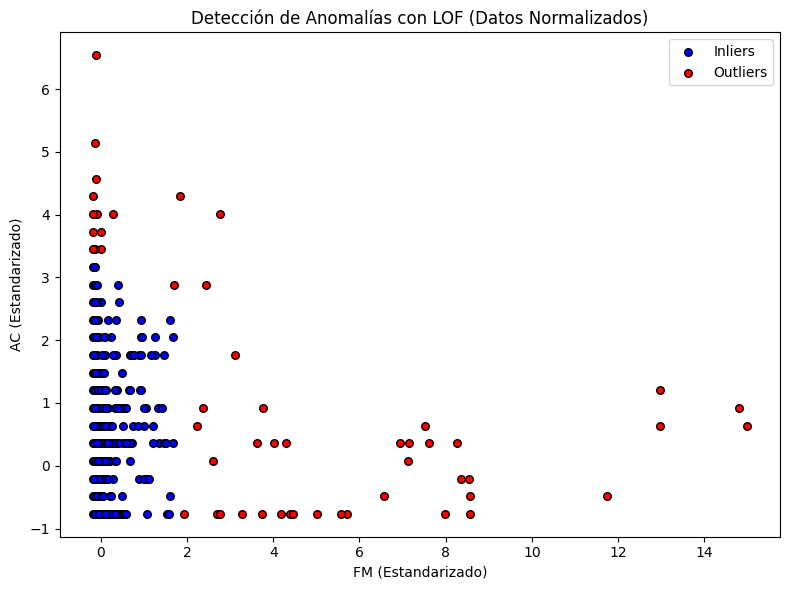

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Extraer solo las columnas numéricas del dataset
num_features = ds.select_dtypes(include=['float64', 'int64']).columns

# Manejo de valores nulos y normalización
ds_clean = ds.dropna().copy()
scaler = StandardScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds_clean[num_features]), columns=num_features)

# Mostrar las columnas disponibles después de la estandarización
print("Columnas disponibles tras la normalización:", ds_scaled.columns)

# Seleccionar las características para el análisis
selected_features = ['FM', 'AC']  # Cambia estas variables según sea necesario

if all(feature in ds_scaled.columns for feature in selected_features):
    data_subset = ds_scaled[selected_features].drop_duplicates()
else:
    raise KeyError(f"Las columnas {selected_features} no están en el DataFrame normalizado.")

# Configuración del modelo LOF
lof = LocalOutlierFactor(n_neighbors=100, contamination='auto')
predictions = lof.fit_predict(data_subset)

# Identificar inliers y outliers
inliers = predictions == 1
outliers = predictions == -1

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.scatter(data_subset[inliers].iloc[:, 0], data_subset[inliers].iloc[:, 1], c='blue', edgecolor='k', s=30, label='Inliers')
plt.scatter(data_subset[outliers].iloc[:, 0], data_subset[outliers].iloc[:, 1], c='red', edgecolor='k', s=30, label='Outliers')

plt.title("Detección de Anomalías con LOF (Datos Normalizados)")
plt.xlabel(selected_features[0] + " (Estandarizado)")
plt.ylabel(selected_features[1] + " (Estandarizado)")
plt.legend()
plt.tight_layout()
plt.show()

**Análisis de Resultados del Local Outlier Factor (LOF)**

Al aplicar LOF sobre las variables estandarizadas FM y AC, se pueden identificar dos grupos principales de datos:

1. Observaciones Normales (Inliers)

Representadas en azul en el gráfico, corresponden a los valores que siguen el patrón general del conjunto de datos.
La mayor concentración de inliers se encuentra cuando FM tiene valores entre 0 y 3, y AC varía entre 0 y 5.
Esto indica que en estos rangos los datos presentan una distribución esperada y sin anomalías destacables.

2. Datos Atípicos (Outliers)

Identificados en rojo, estos puntos son considerados inusuales en relación con el resto de los datos.
Se observa una mayor cantidad de outliers conforme FM aumenta, especialmente en valores superiores a 4.
Aunque en menor cantidad, también aparecen algunos outliers en valores más bajos de FM, lo que sugiere que los datos atípicos no están completamente restringidos a un solo extremo.

3. Patrón de Distribución de Outliers

La mayoría de los valores considerados anómalos aparecen en la zona de FM más alta, lo que podría indicar que aquellos con valores elevados en esta variable presentan un comportamiento distinto al resto.
AC, en cambio, parece tener menos influencia en la detección de outliers, ya que estos aparecen en distintos valores de esta variable sin un patrón tan definido.

**Conclusión**

El análisis con LOF muestra que los datos con valores elevados de FM presentan una tendencia a ser considerados atípicos. Esto sugiere que estos casos deben revisarse en mayor profundidad para determinar si se trata de errores, eventos fuera de lo común o simplemente datos válidos pero poco frecuentes.

**One-Class SVM (Support Vector Machine)**

Este método no supervisado para identificación de anomalías, intenta encontrar una frontera que encapsule la mayoría de los datos de entrenamiento y clasifica nuevos puntos de datos en función de si caen dentro o fuera de esta frontera, no requiere etiquetas de clase.

Valores considerados outliers:
             FM       AC
0    -0.195096 -0.76474
7    -0.195096 -0.76474
8    -0.195096 -0.76474
9    -0.195096 -0.76474
10   -0.195096 -0.76474
...        ...      ...
2117 -0.195096 -0.76474
2118 -0.195096 -0.76474
2119 -0.195096 -0.76474
2120 -0.195096 -0.76474
2121 -0.195096 -0.76474

[608 rows x 2 columns]


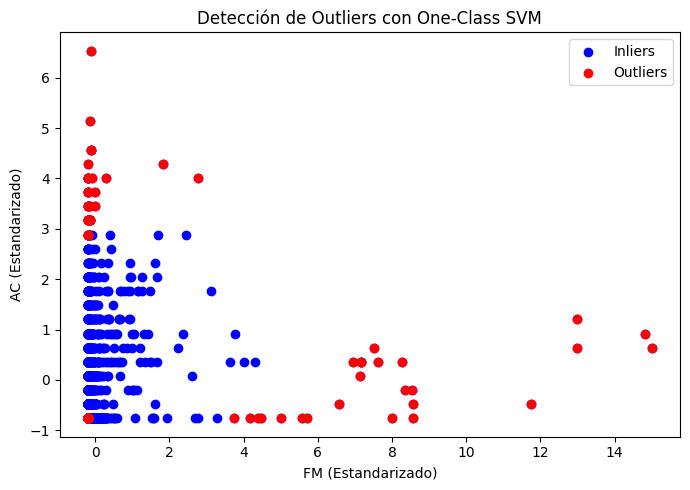

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Seleccionar las variables estandarizadas para el análisis
features_selected = ['FM', 'AC']  # Se pueden modificar según el análisis
data_standardized = ds_scaled[features_selected]

# Inicializar y entrenar el modelo One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
svm_model.fit(data_standardized)

# Predecir anomalías en los datos
predictions = svm_model.predict(data_standardized)

# Identificar los valores que fueron clasificados como outliers
outliers_detected = data_standardized.iloc[np.where(predictions == -1)]
print("Valores considerados outliers:\n", outliers_detected)

# Gráfico de visualización
plt.figure(figsize=(7, 5))
plt.title("Detección de Outliers con One-Class SVM")

# Representar inliers y outliers en el gráfico
plt.scatter(data_standardized['FM'], data_standardized['AC'], c='blue', label='Inliers')
plt.scatter(outliers_detected['FM'], outliers_detected['AC'], c='red', label='Outliers')

# Etiquetas y ajustes del gráfico
plt.xlabel("FM (Estandarizado)")
plt.ylabel("AC (Estandarizado)")
plt.legend()
plt.tight_layout()
plt.show()

**Interpretación de los resultados del One-Class SVM con datos estandarizados**

En el gráfico generado por **One-Class SVM** utilizando las variables estandarizadas **FM** y **AC**, observamos lo siguiente:



1.   Puntos azules (Inliers) :

Los puntos en azul representan las observaciones que el modelo considera como inliers, es decir, datos que siguen el comportamiento esperado en el conjunto de datos.

La mayoría de los inliers se concentran en valores bajos de FM (entre 0 y 4), con valores de  AC que varían entre -1 y 3.5. Esto indica que los valores más comunes en estas variables se encuentran en esta zona del gráfico.

2.   Puntos rojos (Outliers):
  
Los puntos en rojo son las observaciones que el modelo ha clasificado como outliers, o sea, datos atípicos que se desvían del comportamiento normal.

Los outliers están principalmente en dos áreas:

*   Valores altos de FM (entre 6 y 14), donde las observaciones son mucho menos comunes en comparación con los inliers.
*   Algunas observaciones con valores bajos de FM (menores a 2) y altos valores de AC (mayores a 3) también han sido identificadas como outliers.
3.   Distribución de outliers:
  
Los outliers están claramente separados en zonas de FM más altas, lo que sugiere que los valores elevados de FM no siguen el patrón típico de los datos.

Algunos outliers también se encuentran en el rango bajo de FM, pero con valores altos de AC, lo que indica que estas observaciones también podrían ser casos interesantes o anomalías.

4.   Comparación con LOF:
  
Al comparar los resultados con los obtenidos en el algoritmo LOF, ambos modelos identifican puntos con valores altos de FM como outliers, lo que refuerza la idea de que las observaciones con valores más altos de esta variable presentan comportamientos atípicos.

Sin embargo, One-Class SVM parece ser más conservador en la identificación de outliers en las zonas bajas de FM, clasificando menos observaciones como atípicas en esta área.

**Conclusión:**

El modelo One-Class SVM ha identificado de manera efectiva un conjunto de outliers que se separan del comportamiento típico de los datos, especialmente en la región donde FM tiene valores elevados. Esto puede sugerir que las observaciones con altos valores de FM deben ser investigadas más a fondo para determinar si representan anomalías significativas o patrones inusuales en el contexto del conjunto de datos.

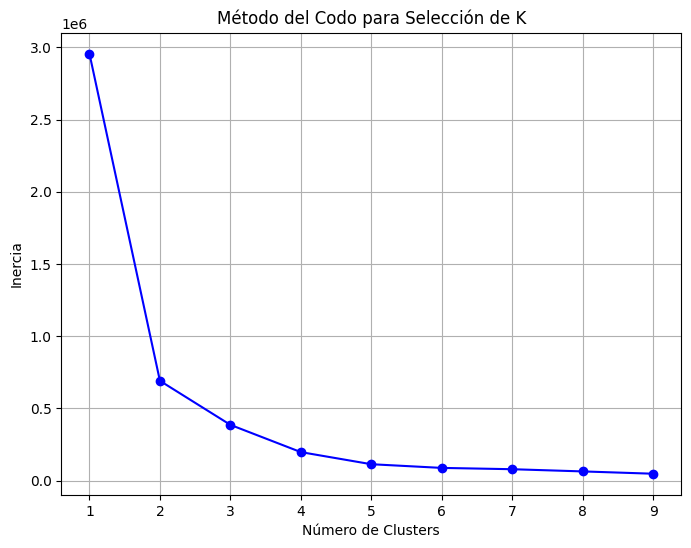

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Seleccionar las variables a utilizar para clustering
data_points = ds[['FM', 'AC']].values
data_points = ds[['FM', 'AC']].dropna().values
# Definir el rango de clusters a evaluar
cluster_range = list(range(1, 10))

# Aplicar K-Means para distintos valores de clusters y almacenar la inercia
inertia_values = []
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_points)
    inertia_values.append(model.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de K')
plt.grid(True)
plt.show()

**Interpretación de la Curva del Codo**

El método del codo permite identificar el número óptimo de clusters al aplicar K-Means. En la gráfica generada, se observa que la inercia disminuye rápidamente al aumentar el número de clusters, pero llega un punto donde la reducción se vuelve menos significativa. Este punto, donde la curva forma una especie de “codo”, indica el número adecuado de clusters, ya que después de este, añadir más clusters no genera una mejora considerable en la compactación de los datos.

**Conclusiones**


*   Selección del número de clusters: A partir de la gráfica, se identifica que el número óptimo de clusters es K = 3, K = 4, donde se observa el cambio en la pendiente.

*   Balance entre simplicidad y precisión: Un número muy bajo de clusters podría no representar bien los datos, mientras que un número demasiado alto puede generar segmentaciones innecesarias.

*   Apoyo con otras métricas: Aunque el método del codo es útil, es recomendable complementarlo con otros indicadores como el coeficiente de silueta para validar la calidad de la segmentación.

*   Aplicaciones del análisis: La identificación del número óptimo de clusters puede ser clave en diversos análisis, como la segmentación de clientes, detección de patrones en datos o clasificación de elementos con características similares.

Centroides:
 [[-0.12375464 -0.48012029]
 [ 7.90308941 -0.05169139]
 [-0.01811498  1.48026144]]


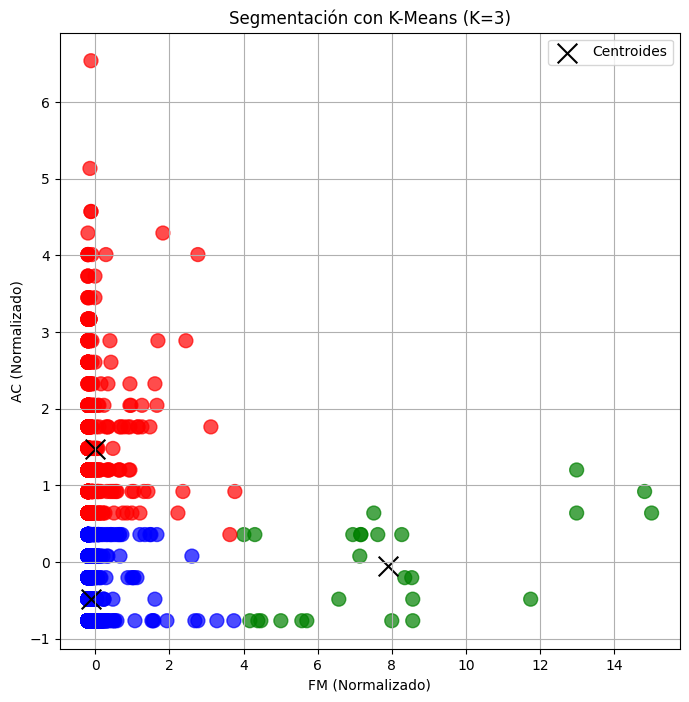

In [ ]:
# Extraer las características estandarizadas a utilizar
data_scaled = ds_scaled[['FM', 'AC']].values

# Aplicar K-Means con K=3 y establecer n_init para evitar advertencias
kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_model.fit(data_scaled)

# Obtener las coordenadas de los centroides
cluster_centers = kmeans_model.cluster_centers_
print("Centroides:\n", cluster_centers)

# Asignar etiquetas a los datos según el modelo
cluster_labels = kmeans_model.predict(data_scaled)

# Definir colores para cada cluster
cluster_colors = ['blue', 'green', 'red']
point_colors = [cluster_colors[label] for label in cluster_labels]

# Visualización de los clusters y sus centroides
plt.figure(figsize=(8, 8))

# Graficar los puntos con su cluster correspondiente
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=point_colors, s=100, alpha=0.7)

# Graficar los centroides
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200, label='Centroides')

plt.xlabel('FM (Normalizado)')
plt.ylabel('AC (Normalizado)')
plt.title('Segmentación con K-Means (K=3)')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación de los resultados del K-Means**

Al analizar los resultados de la segmentación realizada con K-Means y 3 clusters utilizando las variables estandarizadas FM y AC, se pueden destacar los siguientes puntos:

**Cluster rojo:**

Este grupo se compone principalmente de observaciones con valores bajos de FM (rango de 0 a 3) y una amplia dispersión de valores de AC (de -1 a 6).
Es el cluster con mayor número de observaciones, lo que indica que la mayoría de los datos tienen valores bajos en FM, pero muestran gran variabilidad en AC.
El centroide de este cluster se encuentra en un punto intermedio entre los valores de FM y AC, lo que refleja el comportamiento promedio de sus miembros.
**Cluster azul:**

Las observaciones de este grupo presentan los valores más bajos de ambas variables. En FM, los datos se agrupan entre 0 y 2, y en AC, entre -1 y 1.
Este cluster parece representar un patrón donde ambas variables tienden a ser bajas, lo que puede denotar un comportamiento específico para estas observaciones.
El centroide de este grupo se sitúa cerca de la zona de intersección de los ejes FM y AC, lo que refleja la posición media de este grupo de datos.

**Cluster verde:**

Este cluster agrupa observaciones con valores más altos en FM (rango de 6 a 14), pero con valores relativamente bajos y constantes en AC (de -1 a 2).

Es claramente distinto de los dos primeros clusters, especialmente por los altos valores de FM, que lo separan de los demás.

El centroide de este grupo se localiza en un punto donde FM es considerablemente alto, pero AC sigue siendo bajo.

**Centroides:**

Los centroides, representados por la "X" negra en la gráfica, muestran los valores promedio de cada cluster, lo que facilita la visualización de las diferencias entre los grupos formados.

**Distribución de los clusters:**

La segmentación realizada por K-Means revela tres grupos bien diferenciados, siendo el cluster verde el que más se separa del resto debido a sus altos valores de FM.

Aunque los clusters rojo y azul están relativamente cercanos entre sí en términos de FM, presentan diferencias notables en AC, lo que sugiere que cada grupo tiene características particulares en cuanto a esta variable.

**Conclusión**

El análisis de K-Means ha logrado segmentar con éxito los datos en tres grupos, utilizando las variables estandarizadas FM y AC. El cluster verde, que agrupa las observaciones con valores más altos de FM, se destaca como el más diferenciable. Los otros dos clusters muestran una distinción más evidente en cuanto a la variable AC, lo que sugiere que esta característica tiene un papel crucial en la clasificación de las observaciones.

Este tipo de segmentación puede ser útil para identificar patrones dentro de los datos, lo que permite un análisis más detallado y puede ser fundamental para la toma de decisiones o futuras investigaciones sobre los grupos identificados.